# 1.0 Stock Data Exploration

This notebook demonstrates using our data pipeline to download, process, and visualize stock data statistics.

In [13]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.config import get_config
from src.dataset import download_raw, compute_returns
from src.plots import plot_price, plot_returns

## 1. Download Historical Stock Data

In [14]:
config = get_config()
print(f"Default tickers: {config['tickers']}")
print(f"Default period: {config['period']}")
print(f"Default interval: {config['interval']}")

ticker = "MSFT"

Default tickers: ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
Default period: 10y
Default interval: 1d


In [15]:
data = download_raw(ticker, save=True)
raw_data = data[ticker]
raw_data.tail()

[*********************100%***********************]  1 of 1 completed

Saved raw data for MSFT to /Users/hedibelkahia/codes/algo-trader/data/raw/MSFT/MSFT_10y_2025-08-08.csv


,open,high,low,close,volume
Date,,,,,
2025-08-04,528.270020,538.250000,528.130005,535.640015,25349000
2025-08-05,537.179993,537.299988,527.239990,527.750000,19171600
2025-08-06,530.900024,531.700012,524.030029,524.940002,21355700
2025-08-07,526.799988,528.090027,517.549988,520.840027,16079100
2025-08-08,522.559998,524.659973,519.409973,522.039978,15496974


## 2. Clean and Process Data

In [16]:
data = compute_returns(raw_data)
data.tail()

,open,high,low,close,volume,daily_return,log_return,tot_return,volatility_20d
Date,,,,,,,,,
2025-08-04,528.270020,538.250000,528.130005,535.640015,25349000,0.021999,0.021761,9.020667,0.011816
2025-08-05,537.179993,537.299988,527.239990,527.750000,19171600,-0.014730,-0.014840,8.886804,0.012466
2025-08-06,530.900024,531.700012,524.030029,524.940002,21355700,-0.005324,-0.005339,8.839360,0.012332
2025-08-07,526.799988,528.090027,517.549988,520.840027,16079100,-0.007810,-0.007841,8.770050,0.012460
2025-08-08,522.559998,524.659973,519.409973,522.039978,15496974,0.002304,0.002301,8.790232,0.012453


## 3. Data Visualization

In [17]:
fig_stock = plot_price(data, ticker, save=True, normalized=True)
fig_stock.show()

Interactive plot saved to /Users/hedibelkahia/codes/algo-trader/reports/figures/MSFT_price_plot.html


Figure saved to /Users/hedibelkahia/codes/algo-trader/reports/figures/MSFT_returns_distribution.png


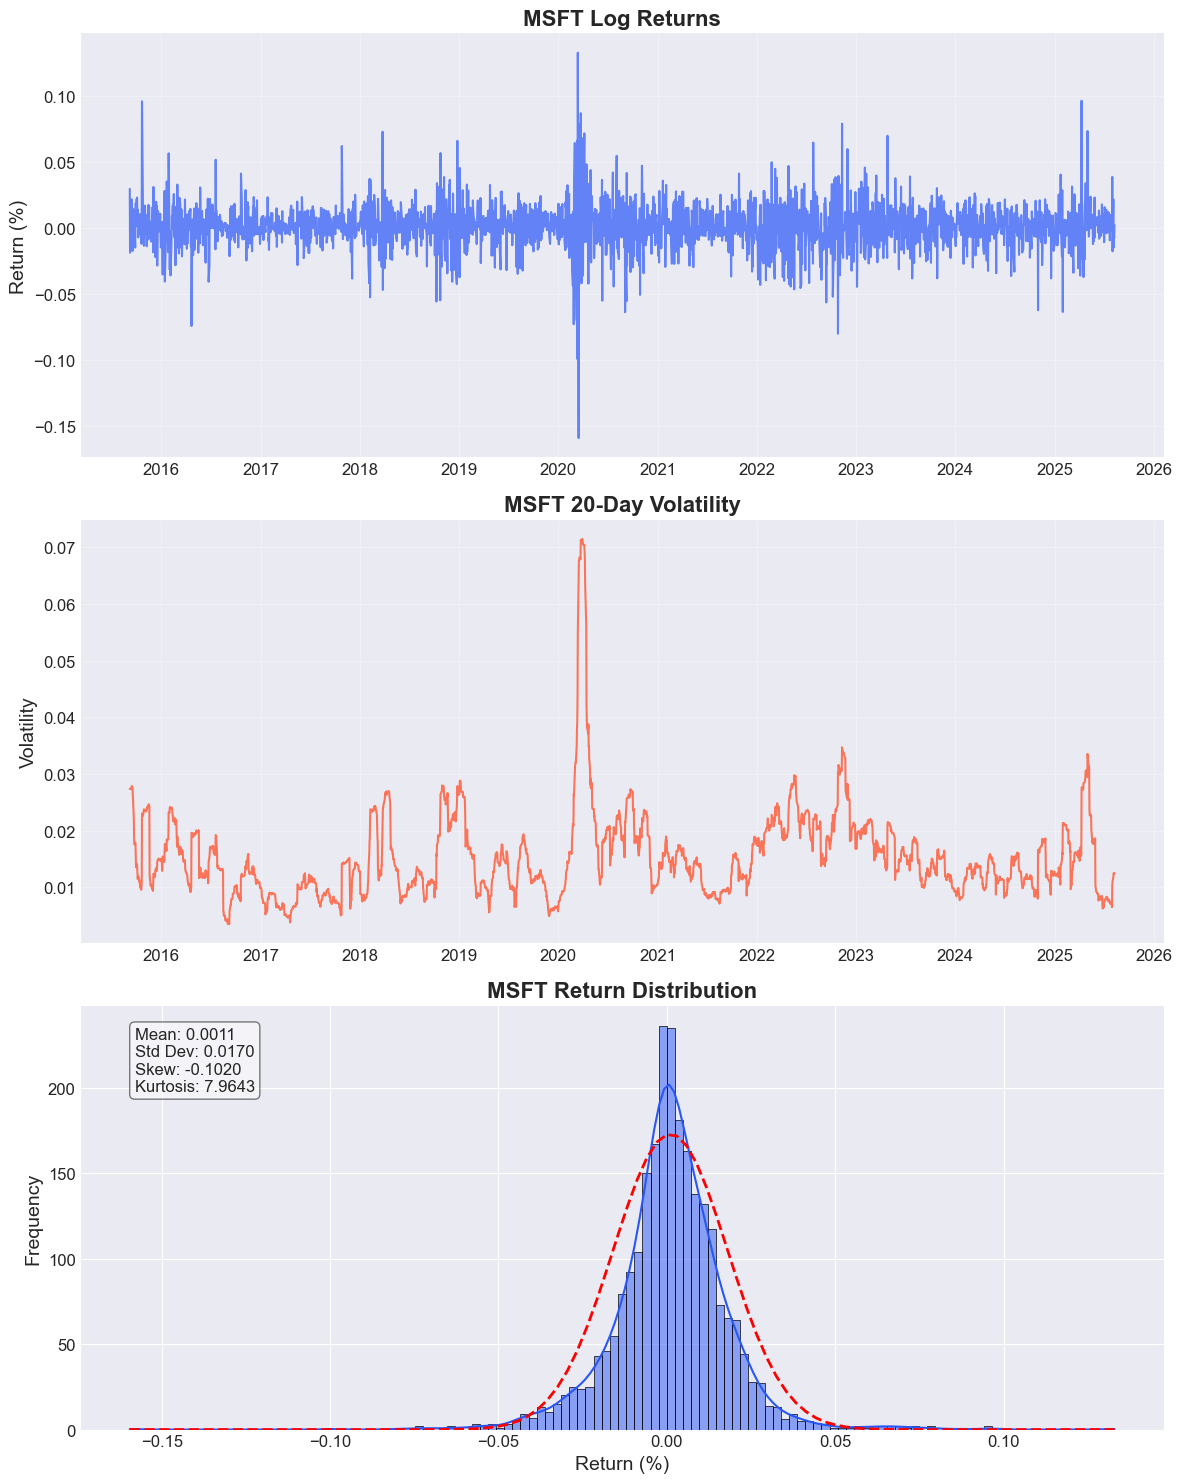

In [18]:
fig_returns = plot_returns(data, ticker, save=True)